# Analyse en composante principale

C'est une bonne technique pour visualiser des données multi-dimensionnelles. 
Travaillons tout de suite avec des données de dimension 3. 

## Créons et observons des données gaussiennes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:

def create_gaussianData():    
    nbData=400
    
    cov01=5
    cov02=-1
    
    sigma2=np.array([
        [20,    cov01,  cov02],
        [cov01, 2,      0],
        [cov02, 0,      0.1]
    ])
    
    """peut-on choisir n'importe quelles valeurs pour cov01 et cov02 ?"""
    
    U,S2,U_T = np.linalg.svd(sigma2)
    
    S_diag=np.diag(np.sqrt(S2))
    
    sigma=U @ S_diag @ U_T
    
    return np.random.normal(size=[nbData,3])@sigma+np.array([5,10,-3])


X=create_gaussianData()
""" A la la shape habituelle d'une dataFrame : les individus sont les lignes, les variables les colonnes. """
print("X.shape",X.shape)

X.shape (400, 3)


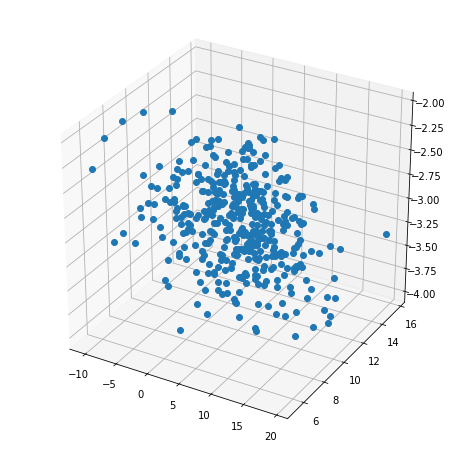

In [20]:
"""Observons les données dans leur ensemble, avec un tracé 3D """
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1,1,1, projection='3d')
ax.plot(X[:,0],X[:,1],X[:,2],'o');


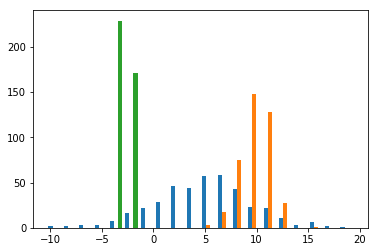

In [12]:
"""observons les 3 loi marginales"""
plt.hist(X,bins=20)
plt.show()

observons les va 2 à 2

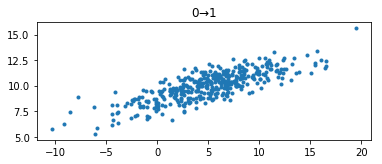

In [13]:
plt.plot(X[:,0],X[:,1],'.')
plt.gca().set_aspect('equal')
plt.title("$0 → 1$");

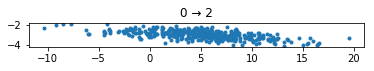

In [14]:
plt.plot(X[:, 0], X[:, 2],'.')
plt.gca().set_aspect('equal')
plt.title("0 → 2");

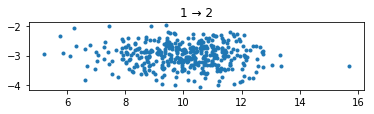

In [15]:
plt.plot(X[:, 1], X[:, 2],'.')
plt.gca().set_aspect('equal', adjustable='box')
plt.title("1 → 2");

estimons la matrice de covariance

In [16]:
mu = np.mean(X,axis=0)
X_cen=X-mu
cov=np.cov(X.T)
print("cov\n",cov)

cov
 [[21.06700438  5.31262625 -1.09234643]
 [ 5.31262625  2.09402173 -0.03962299]
 [-1.09234643 -0.03962299  0.1621997 ]]


Considérons la décomposition en valeur singulière de la matrice de covariance. 
$$
cov= U S^2 U^T
$$
Le repère $U_0,U_1,U_2$ composé des trois colonnes de $U$ représente les principales direction du nuage des simulations. Ces directions sont ordonnées par odre décroissant d'importance: le grand axe du nuage étant $U_0$.  Pour observer au mieux le nuage en 2D, il faut le projeter sur le plan engendré par $U_0,U_1$, donc le plan orthogonal à $U_2$. Mais attention: 

* soit on considère le plan affine passant par l'espérance $\mu$.
* soit on centre le nuage, en soustrayant $\mu$, et on considére le plan vectoriel passant par zéro. 

On préfèrera cette la seconde option. L'équation du plan est donc $ax+by+cz=0$ avec $[a,b,c]=U_2$. 


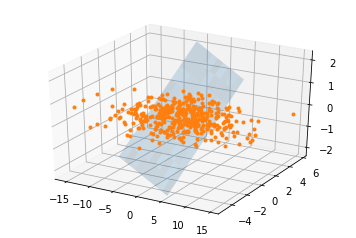

In [23]:
U, S2, V = np.linalg.svd(cov)

normal=U[:,2]

# on crée la grille correspondant au plan de base z=0. 
lim=5
xx, yy = np.meshgrid(np.linspace(-lim,+lim,10),np.linspace(-lim,+lim,10))

#  on calcule les altitudes z
z = (-normal[0] * xx - normal[1] * yy) * 1. / normal[2]


fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
# le plan
ax.plot_surface(xx, yy, z, alpha=0.2)
# les points
ax.plot(X_cen[:, 0], X_cen[:, 1], X_cen[:, 2], '.');

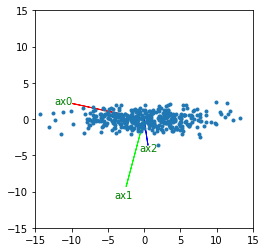

In [66]:

U01=U[:,:2]
X_proj=X_cen @ U01  

""" la base canonique, un peu agrandie """
axis=np.diag([10,10,10])
axis_proj= axis @ U01

plt.plot(X_proj[:,0],X_proj[:,1],'.')
plt.gca().set_aspect("equal")
lim=15
plt.xlim(-lim,lim)
plt.ylim(-lim,lim)

colors=np.diag([1,1,1])
for i in range(3):
    plt.arrow(0, 0, axis_proj[i,0], axis_proj[i,1], head_width=0.1, head_length=0.2,color=colors[i,:])
    plt.text(axis_proj[i,0]* 1.15, axis_proj[i,1] * 1.15, "ax"+str(i), color = 'k', ha = 'center', va = 'center')


## Interpréter des données

Nous créons un jeu de donnée. L'input `X` comprend:
* Le poids
* La taille
* Le tour de tête. 

L'output `Y` indique si l'individu est en surpoids (`Y=1`) ou pas (`Y=0`) 

Dans un premier temps, ne regardez pas comment ces données sont construites. Prenez-les comme de vraies données fournie par l'observations d'individus. 


In [67]:
def makeData_surPoids():
    nbData=200

    """ des poids d'adultes, entre 50 et 100 kilos """
    poids=np.random.beta(2,5,size=nbData)*100 +30

    """ des IMC (indices de masses corporelles), """
    IMC = np.random.beta(1,5,size=nbData)*25+16

    """ des tailles, que l'on construit à partir des poids et de l'ICM"""
    taille=np.sqrt(poids/IMC)-0.1

    """ mesure du tour de tête """
    tete=np.random.beta(3,1)*10+2*IMC

    X=np.stack([poids,taille,tete],axis=1)

    Y=(IMC>25).astype(np.int32)

    return X,Y


X,Y=makeData_surPoids()
print("X.shape:",X.shape)
print("Y.shape:",Y.shape)
print("X[:4]: \n",X[:4])
print("Y[:10]: ",Y[:10])


X.shape: (200, 3)
Y.shape: (200,)
X[:4]: 
 [[46.46791289  1.44663793 40.51574735]
 [47.39702587  1.48813053 39.24891413]
 [58.34976165  1.67450926 38.72502885]
 [44.37618244  1.3495373  43.90415203]]
Y[:10]:  [0 0 0 0 0 0 1 0 0 0]


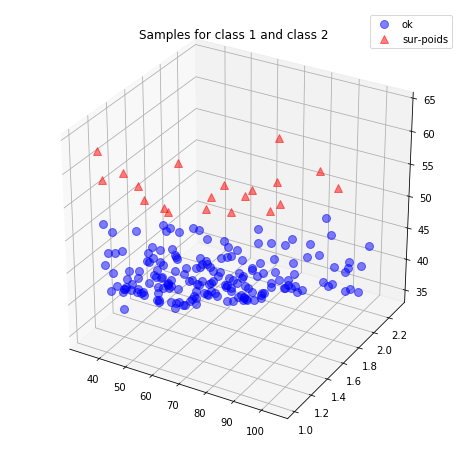

In [68]:
class0=X[Y==0]
class1=X[Y==1]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10
ax.plot(class0[:,0], class0[:,1], class0[:,2], 'o', markersize=8, alpha=0.5, color='blue',label='ok')
ax.plot(class1[:,0], class1[:,1], class1[:,2], '^', markersize=8, alpha=0.5, color='red' ,label='sur-poids')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right');
    

A vous : projetez les donnée sur le plan de plus grande variance.
Faut-il centrer-réduire les données dans ce cas là ?

Que peut-on en déduire de l'influence de la troisième variable (le tour de tête)?

## Iris: la star des jeux de données .

Nous observons le jeux données `iris` étudié la première fois par Fisher,R.A. Il s'agit sans doute du jeu de données le plus célèbre au monde.  L'input `X` est constitué des 4 variables:
* sepal length (cm)
* sepal width (cm)
* petal length (cm)
* petal width (cm)

L'output `Y` correspond à 3 espèces d'iris: 
* setosa
* versicolor
* virginica

![data_set_iris](./img/iris.png)


In [38]:
data=np.loadtxt("./data/iris.csv",delimiter=",")
print("data.shape:",data.shape)
print("data[:3]\n",data[:3,:])
X=data[:,:4]
print("X.shape:",X.shape)
Y=data[:,4].astype(np.int64)
print("Y.shape:",Y.shape)
print("Y\n",Y)

data.shape: (150, 5)
data[:3]
 [[5.1 3.5 1.4 0.2 0. ]
 [4.9 3.  1.4 0.2 0. ]
 [4.7 3.2 1.3 0.2 0. ]]
X.shape: (150, 4)
Y.shape: (150,)
Y
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Ce jeu de donnée est aussi inclus dans de nombreuses bibliothèques, comme `sklearn`. On peut donc le charger ainsi:
```python
    from sklearn import datasets
    iris = datasets.load_iris()
    X = iris.data
    y = iris.target
```
et avoir des tas d'informations en tapant
```python
    print(iris.DESCR)
```

cov
 [[ 0.68569351 -0.03926846  1.27368233  0.5169038 ]
 [-0.03926846  0.18800403 -0.32171275 -0.11798121]
 [ 1.27368233 -0.32171275  3.11317942  1.29638747]
 [ 0.5169038  -0.11798121  1.29638747  0.58241432]]


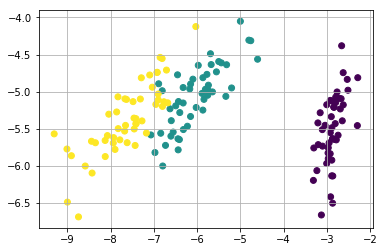

In [43]:
import numpy as np
import matplotlib.pyplot as plt

input_names=["sepal_l","sepal_w","petal_l","petal_w"]
output_names=["setosa","versicolor","virginica"]

cov=np.cov(X.T)
U,S,U_T=np.linalg.svd(cov)
print("cov\n",cov)

X_proj = X@U[:,:3]
plt.scatter(X_proj[:,0],X_proj[:,1],c=Y)
plt.grid()


***A vous:*** Rajouter les 3 axes projetés. Mettez des légendes. Quelle est l'input le plus discriminante? Quelle est la combinaisons linéaire d'input la plus discriminante?

## Application à la compression d'image

Nous allons observer des images représentant des chiffres en écriture manuscrite. Chaque image a une résolution de $8\times 8$ pixels, et peut donc être considéré comme un vecteur de $\mathbb R^{64}$. Chaque image est donc un input, chaque chiffre représenté est l'output correspondant.  


digits.data.shape: (1797, 64)


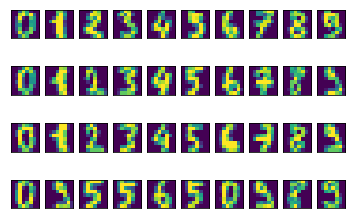

In [59]:

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits

digits = load_digits()
print("digits.data.shape:",digits.data.shape)

k=-1
for i in range(4):
    for j in range(10):
        k+=1
        plt.subplot(4,10,k+1)
        img=digits.data[k].reshape([8,8])
        plt.imshow(img)
        #on supprime les ticks
        plt.xticks([])
        plt.yticks([])

Observons comment on fait de l'analyse en composante principale (=PCA=Principal Component Analysis) avec `sklearn`. La syntaxe peut vous paraitre obscure, de même que la syntaxe que nous avons utilisé précédemment peut paraitre obscure à un non-matheux. 

(1797, 64)
(1797, 2)


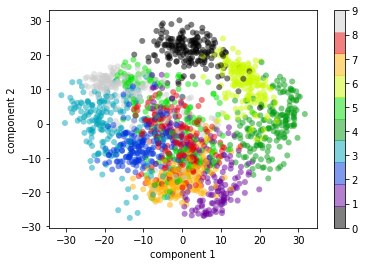

In [57]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

***Exo:*** Imaginons qu'on vous impose de compresser chaque des images de `digit` en résolution $n \times n$ avec $n<8$.  Quelle technique adopter sachant que vous avez le droit d'effectuer une opération de décompression. Effectuer cette opération avec plusieur $n$ différents. Observez. Vous pouvez utiliser `sklearn`, ou bien `np.linalg.svd`.

